In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = r'D:\pic'


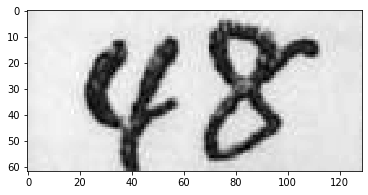

In [2]:
# imraw = plt.imread(os.path.join(path, 'recf.jpg'))

im = Image.open(os.path.join(path, '48.jpg'))

# w, h = im.size
# im.thumbnail((w, 28))
imraw = np.array(im)[:,:,0]

plt.imshow(imraw, cmap=plt.cm.gray)
plt.show()


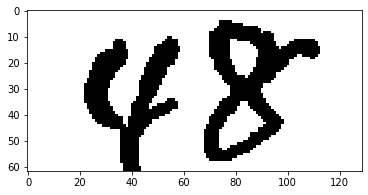

In [3]:
imsolid = np.where(imraw >= 128, 1, 0)
plt.imshow(imsolid, cmap=plt.cm.gray)
plt.show()

In [4]:
hnum = imsolid.shape[0]
vnum = imsolid.shape[1]

vvec = np.mean(imsolid, axis=0)
hvec = np.mean(imsolid, axis=1)


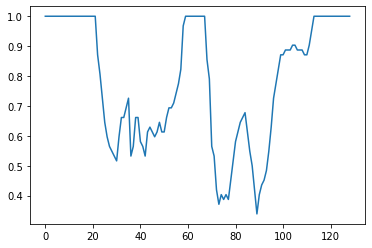

In [5]:
plt.plot(range(vnum),vvec)
plt.show()

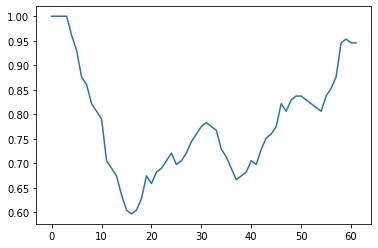

In [6]:
plt.plot(range(hnum),hvec)
plt.show()

In [7]:
vvec_binary = np.where(vvec > 0.8)[0]

print(vvec_binary)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  57  58  59  60  61  62  63  64  65  66  67  68
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128]


In [8]:
splits = []
start = 0

for i in range(len(vvec_binary)):
    if i - start != vvec_binary[i] - vvec_binary[start]:
        splits.append(int((vvec_binary[start] + vvec_binary[i - 1]) / 2))
        start = i

splits.append(int((vvec_binary[start] + vvec_binary[-1]) / 2))
splits


[11, 62, 113]

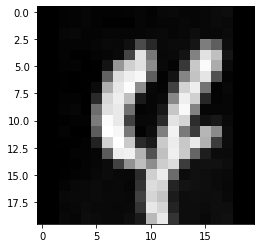

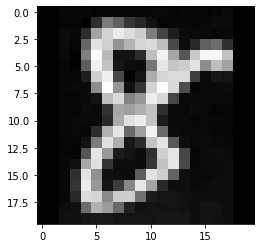

In [9]:
from PIL import ImageOps

splitted_im = []
regsize = 20

for i in range(len(splits) - 1):
    curimg = im.crop((splits[i], 0, splits[i + 1], hnum))
    curimg.thumbnail((100, regsize))
    curimg = np.array(curimg)[:, :, 0]
    factor = 1 / np.max(curimg)
    curimg = curimg * factor

    # padding
    curw = curimg.shape[1]
    leftpadding = int((regsize - curw) / 2)
    rightpadding = regsize - curw - leftpadding
    #padcurimg = curimg.crop((-leftpadding, 0, regsize - leftpadding, regsize))
    curimg = np.hstack((np.ones([regsize, leftpadding]), curimg, np.ones([regsize, rightpadding])))

    splitted_im.append(1-curimg)

for img in splitted_im:
    plt.imshow(img, cmap=plt.cm.gray)
    plt.show()


In [10]:
def readdata(path, shape):
    infile = open(path, 'r')
    img_data = infile.read().strip().split('\n')
    img = [map(float, a.strip().split(',')) for a in img_data]
    pixels = []
    for p in img:
        pixels += p
    return np.reshape(pixels, shape)


hidden_dim = 25
input_dim = 400
output_dim = 10

theta1 = readdata(os.path.join(path,'net1\ps5_theta1.csv'), (hidden_dim, -1))
theta2 = readdata(os.path.join(path,'net1\ps5_theta2.csv'), (output_dim, -1))

print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [11]:
netimages = []
for img in splitted_im:
    netimages.append(np.append([1], img.flatten()))
netimages = np.array(netimages)
# print(netimages[1])

In [12]:
def sigmoid(d):
    return 1 / (1 + np.exp(-1 * d))

hiddenval_raw = np.matmul(theta1, netimages.T)
hiddenval = sigmoid(hiddenval_raw)

hiddenval_appendone = np.vstack([np.ones(hiddenval.shape[1]), hiddenval])

outputval_raw = np.matmul(theta2, hiddenval_appendone)
outputval = sigmoid(outputval_raw)

our_answer = (np.argmax(outputval, axis=0) + 1) % 10


In [13]:
our_answer

array([7, 4], dtype=int64)

In [14]:
outputval

array([[2.13342037e-03, 2.73324129e-04],
       [6.09879690e-03, 8.51567553e-04],
       [1.21508703e-04, 3.43721859e-03],
       [3.96862391e-04, 1.20361283e-01],
       [1.17579189e-02, 8.08599196e-02],
       [4.21789751e-02, 7.68559062e-04],
       [1.66379195e-01, 6.81541508e-02],
       [7.84544180e-03, 1.12152454e-02],
       [1.22502057e-02, 9.26166085e-05],
       [9.20321789e-02, 7.13866980e-02]])